<img src="../figuras/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Cúbits
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\bn}{{\bf n}} $

In [1]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

# El cúbit

Un *bit* es una variable  real $a$ que puede tomar valores en $ {\mathbb Z}_2= \{0, 1\}$.



<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Definición</b>: 
<br>
un cúbit es un <i>espacio de Hilbert</i> complejo de dimensión dos, $~\ket{v}~\in~\Hil \sim {\mathbb C}^2$ 
</p></div>

- Cualquier *sistema físico*  cuyo estado instantáneo se pueda describir mediante un vector $\ket{v}\in {\mathbb C}^2$ puede albergar físicamente un **cúbit**. 
<br>

- A efectos prácticos,  se trata de sistemas que pueden estar en dos niveles de energía bien definidos y conmutar entre  ellos de manera controlada.
<br>


- Un **cútrit** es un espacio de Hilbert de dimensión $3$, un **cúdit** de dimensión $d$.



## Bases 

**Base computacional** 

Para representar vectores de estado  $\ket{u}\in \Hil$ necesitamos una *base*  formada por dos vectores ortonormales. 

La base que usaremos   $B=\{\ket{0},\ket{1}\}$ y se denomina *base computacional*.

La base computacional es *ortonormal*

$$
\braket{0}{0} = \braket{1}{1} = 1 ~~~~~~~~~~\braket{0}{1} = \braket{1}{0} = 0
$$

La base computacional también recibe el nombre de base Z.

 
 
- Base $Z$ (base computacional) 
     $$
    \begin{array}{rclcl}
    \ket{0}_Z ~~\equiv ~~\ket{0} &\sim& \begin{bmatrix}  1\\ 0\end{bmatrix} \\
    \ket{1}_Z ~~\equiv~~\ket{1} &\sim&  \begin{bmatrix}  0\\ 1\end{bmatrix}
    \end{array}
    $$
    
  El nombre indica que esta base  la forman autoestados del operador 
  
  $$Z= \sigma_z = \begin{bmatrix} 1& 0 \\ 0 & -1 \end{bmatrix}$$ 
  
  con autovalores $\pm 1$.

Hay infinitas bases ortonormales para ${\mathbb C}^2$. Otras dos muy utilizadas son las bases $X$ e $Y$

- Base $X$ 
    $$
    \begin{array}{rclcl}
    \ket{0}_X ~~\equiv ~~\ket{+} &=& \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) &=  & \frac{1}{\sqrt{2}}\begin{bmatrix}
    1\\ 1\end{bmatrix} \\
    \ket{1}_X ~~\equiv~~\ket{-} &=&  \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) &=& \frac{1}{\sqrt{2}}\begin{bmatrix}
    1\\ -1\end{bmatrix}
    \end{array}
    $$
<br>

-  Esta base la forman autovectores del operador $X= \sigma_x = \begin{bmatrix} 0& 1 \\ 1 & 0 \end{bmatrix}$ con autovalores $\pm 1$.

- Base $Y$
$$
    \begin{array}{rclcl}
    \ket{0}_Y ~~\equiv ~~\ket{+i} &=& \frac{1}{\sqrt{2}}(|0\rangle+i |1\rangle) &=  & \frac{1}{\sqrt{2}}\begin{bmatrix}
   1\\ i \end{bmatrix} \\
    \ket{1}_Y ~~\equiv~~\ket{-i} &=&  \frac{1}{\sqrt{2}}(|0\rangle-i |1\rangle) &=& \frac{1}{\sqrt{2}}\begin{bmatrix}
     1 \\-i \end{bmatrix}
    \end{array}
$$
<br>
Esta base la forman autoestados del operador $Y=\sigma_y =  \begin{bmatrix} 0& -i \\ i & 0 \end{bmatrix}$ con autovalores $\pm 1$.

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
Escribe las matrices $u_{ij}$ de cambio de la base $Z\to X$

$$
\ket{j}_X = \sum_j u_{ij}\ket{i}_Z
$$
    
 Haz lo mismo para  $Z\to Y$ y $X\to Y$.
</div>

##  Esfera de Bloch 


En un *bit clásico* sólo podemos almacenar un valor 0 ó 1. 

¿Cuánta información puede almacenar un *cúbit*? 


Un cúbit general será de la forma $\ket{u} = a\ket{0} + b\ket{1}$ donde $a$ y $b$ son dos números complejos, es decir cuatro números reales. 

Sin embargo, están sometidos a la ligadura $|a|^2+|b|^2=1$, lo que nos deja  tres grados de libertad reales. 

Pero uno de ellos es una fase global que no tiene significado. 

Por tanto el *número de grados de libertad (reales) en un cúbit es 2.*


<div class="alert alert-block alert-info">
<p style="text-align:left ;color: navy;">  
<b> Lema </b>:
<br>    
El cúbit $\ket{u}$  <i> más general</i> se puede representar, en la base computacional $\{\ket{0},\ket{1}\}$, usando dos números reales (ángulos) $\theta\in [0,\pi)$ y $\varphi\in [0,2\pi)$   
<br>
<br>
$$
|u\rangle = \cos{\frac{\theta}{2}}\, |0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}\,|1\rangle 
$$
</p>
</div>  

<details>
<summary><p style="text-align:left"> >> <i>Demostración</i> </p></summary>

Para demostrar el lema escribimos un vector de estado general usando la representación polar para las componentes complejas
    
$$
\begin{array}{rcl}
\ket{u} &=& u_0\ket{0} + u_1\ket{1} \\
&=& a_0 e^{i b_0}\ket{0} + a_1 e^{ib_1}\ket{1}\\
&=& e^{i b_0}\big(a_0 \ket{0} + a_1 e^{i(b_1-b_0)}\ket{1}\big)\\
&\sim & \big( a_0 \ket{0} + a_1 e^{i(b_1-b_0)}\ket{1} \big)
\end{array}
$$
    
donde hemos hecho uso de la irrelevancia de una fase global para descartar $e^{i b_0}$ en la última línea.

Ahora $a_1$ y $a_0$ no son números independientes sino que verifican $a_0^2 + a_1^2 = 0$ para que $\|\ket{u}\|=1$.
Esta ecuación se puede resolver en términos de un ángulo $\theta/2$ tal que
$$
a_0 = \cos\frac{\theta}{2}~~~,~~~ a_1 = \sin\frac{\theta}{2} 
$$
Por su parte, de los números $b_1, b_2$ sólo la diferencia
$$
\varphi = b_1-b_2
$$
es relevante para especificar $\ket{u}$.   
</details>

 En componentes en la base $Z$ escribimos equivalentemente

$$
\ket{u} =  \begin{bmatrix} \cos\displaystyle\frac{\theta}{2} \\  e^{i\phi}\sin\displaystyle\frac{\theta}{2} \end{bmatrix} ~~~~~~~~,~~~~~
~~~~~
\ket{u_\perp} =  \begin{bmatrix} -e^{-i\phi}\sin\displaystyle\frac{\theta}{2} \\  \cos\displaystyle\frac{\theta}{2} \end{bmatrix} 
$$


El rango de $\theta\in [0,\pi)$ y $\varphi\in [0,2\pi)$ permite interpretar estos números reales como *ángulos sobre la esfera unidad*.

Dicho de otro modo, podemos representar  cada estado de un cúbit como un *punto* sobre una esfera de radio unidad: la *esfera de Bloch*. 



-  $\theta\in [0,\pi)$ el ángulo *azimutal* se mide desde el eje $Z$. De modo que $\theta=\pi/2$ es el *ecuador 
de la esfera de Bloch*.
<br>

-  $\phi\in [0,2\pi)$ el ángulo *polar*  en torno al eje $Z$, medido a partir del plano $XZ$
<br>

<div>
<img src="images/BlochSphere.png" width="25%" style="margin:auto"/>
</div>
<br>


Los estados ortonormales $\{\ket{u}$ , $\ket{u_\perp}\}$ 


- están situados sobre el mismo eje en la esfera de Bloch, en sentidos opuestos
<br>

- forman una base del espacio de un cúbit $\mathbb{C}^2$

### Vectores en la Esfera de Bloch: visualizaciones





- [Visualizador java](https://javafxpert.github.io/grok-bloch/?fbclid=IwAR1lWfCug1lfTXxXenaJxnsdJh2g3he6lBJmjnjL_Jus0gOHR9u3UuaT7qs)


-  La clase <a href=https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html>statevector</a> en *qiskit* cuenta con un *visualizador* de la esfera de Bloch. La clase  acepta una lista de dos números complejos como componentes de un vector. 
<br>

Es necesario asegurarse de que el vector está normalizado, porque no avisa de lo contrario.


In [4]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex , plot_bloch_multivector  

# Ejemplo de vector de estado |+> 
e_mas =1/np.sqrt(2)*np.array([1,1])

Statevector(e_mas).draw('latex')

<IPython.core.display.Latex object>

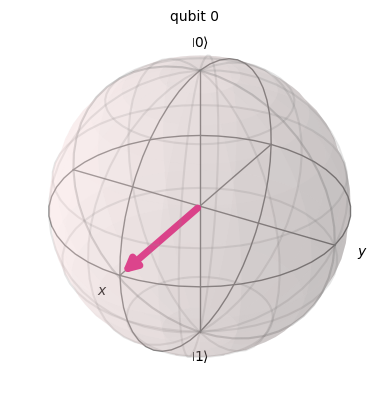

In [5]:
Statevector(e_mas).draw('Bloch')

Dados dos ángulos $\theta\in(0,\pi)$ y $\phi\in(0,2\pi)$ 

In [ ]:
theta = 1.9
phi   = 0.8

uket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)

Statevector(uket).draw('latex')

In [ ]:
Statevector(uket).draw('Bloch')

### Bases
<br>



**Base Z**
  
-   $(\theta,\phi) = (0,0) \Rightarrow  \ket{0}_Z = \ket{0}$ 




  
-   $(\theta,\phi) = (\pi,\phi)  \Rightarrow  e^{i\phi}\ket{1}_Z = \ket{1}$
  
  
 
<div>
<img src="images/Basis_Z.png"  width="30%" style="margin:auto"/>
</div>


**Base X**
 
-   $(\theta,\phi) = (\pi/2,0)  ~\Rightarrow~  \frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle \big) =\ket{0}_X \equiv |+\rangle$
<br>
  
-   $(\theta,\phi) = (\pi/2,\pi) ~\Rightarrow~  \frac{1}{\sqrt{2}}\big(|0\rangle-|1\rangle \big)=\ket{1}_X \equiv |-\rangle$

<div>
<img src="images/Basis_X.png"  width="30%" style="margin:auto"/>
</div>


**Base Y**

-   $(\theta,\phi) = (\pi/2,\pi/2) ~\Rightarrow ~|u\rangle =\frac{1}{\sqrt{2}}\big(|0\rangle+i|1\rangle\big) =\ket{0}_Y \equiv  |+i\rangle$
<br>


-   $(\theta,\phi) = (\pi/2,3\pi/2) ~\Rightarrow ~|u\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle-i|1\rangle\big) = \ket{1}_Y \equiv  |-i\rangle$


<div>
<img src="images/Basis_Y.png"  width="30%" style="margin:auto"/>
</div>



# Registro cuántico

Un **registro cuántico** contiene la *evolución temporal* de un cúbit.  


<br>
<div>
<img   src="images/q_register.png"   width="30%" style="margin:auto"/>
</div>
<br>

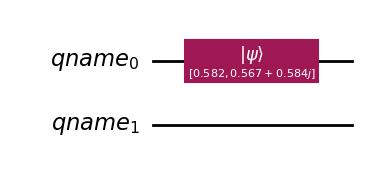

In [8]:
'en qiskit podemos inicializar un registro cuántico en un estado |q> arbitrario usando el método initialize()'
from qiskit import QuantumCircuit, QuantumRegister

qr = QuantumRegister(2,name='qname')

qc = QuantumCircuit(qr)

theta = 1.9
phi   = 0.8

ket = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]

qc.initialize(ket,qr[0])
qc.draw(output='mpl')

Un registro cuántico puede llevar una superposición lineal $\ket{\psi} = a\ket{0} + b\ket{1}$.
Un registro clásico solo puede valer $0~$ ó $~1$

# Operadores sobre un cúbit

Un operador unitario conserva la norma y, por tanto, lleva un vector a otro de la misma esfera de Bloch. 

Esta operación  se puede visualizar como una **rotación** de un cierto ángulo $\alpha$, en torno a algún eje $\hat{\bf n}$

$$ \ket{u} = R_{\hat\bn}(\alpha)\ket{v}$$

<div>
<img src="images/BlochSphere2.png"  width="30%" style="margin:auto"/>
</div>


## Rotaciones en la esfera de Bloch

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Teorema</b>:
<br>
    El operador que efectúa una <i>rotación de ángulo</i>  $\alpha\in [0,2\pi)$ en torno al <i>eje que marca un vector unitario</i>  $\hat{\bf n} = (n_x, n_y,n_z)$ es el siguiente
<br> 
<br>    
\begin{eqnarray}
R_{\hat{\bf n}}(\alpha)~ = ~\exp\left( -i\frac{\alpha}{2} \hat{\bf n}\cdot \boldsymbol{\sigma} \right) ~=~ 
\cos \frac{\alpha}{2} I - i \sin\frac{\alpha}{2} \hat{\bf n}\cdot\boldsymbol{\sigma} 
\end{eqnarray}
</p>    
</div> 
<br>

donde $\boldsymbol{\sigma} = (\sigma_x, \sigma_y, \sigma_z)$ son las matrices de Pauli
$$
\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}~~,~~
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}~~,~~
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}~~.~~
$$

<div class="alert alert-block alert-danger",text-align:center>
<b> Nota</b>:
    el sentido de la rotación que produce $R_{\hat{\bf n}}(\alpha)$ en torno al eje $\hat{\bf n}$, viene dado por la <i>regla de la mano derecha</i> o, también, <i>anti-horario</i>. 
</div>

Haciendo la suma explícitamente podemos escribir la matriz unitaria 
<br>
<br>

\begin{eqnarray}
R_{\hat{\bf n}}(\alpha)~  ~=~ 
 \begin{bmatrix} \cos \displaystyle\frac{\alpha}{2} - i n_z\sin\frac{\alpha}{2} &\displaystyle (-in_x- n_y)\sin\frac{\alpha}{2} \\ \displaystyle
(-in_x + n_y) \sin\frac{\alpha}{2} & \displaystyle \cos \frac{\alpha}{2} + i n_z\sin\frac{\alpha}{2} \end{bmatrix}
\end{eqnarray}


### Rotaciones X, Y y Z

- Asociado a rotaciones en torno a los ejes $X$, $Y$ y $Z$ de un ángulo $\alpha$ encontramos las tres puertas siguientes


<br>

$$
\begin{array}{rcl}
\hat{\bf z} = (0,0,1) ~~\Rightarrow ~~ R_{\hat {\bf z}}(\alpha) &=&  \begin{bmatrix} e^{-i\alpha/2}  & 0 \\ 0 & e^{i\alpha/2}  \end{bmatrix}  ~,~\nonumber\\
\rule{0mm}{14mm}
\hat{\bf y} = (0,1,0) ~~\Rightarrow ~~ R_{\hat {\bf y}}(\alpha) &=&  \begin{bmatrix} \cos \alpha/2  & -\sin \alpha/2 \\   \sin\alpha/2 & \cos\alpha/2 \end{bmatrix}  \nonumber \\
\rule{0mm}{14mm}
\hat{\bf x} = (1,0,0) ~~\Rightarrow ~~ R_{\hat {\bf x}}(\alpha)  &=&  \begin{bmatrix} \cos\alpha/2  &- i\sin\alpha/2 \\   -i\sin\alpha/2& \cos\alpha/2 \end{bmatrix} \, .\nonumber
\end{array}
$$

<br>



### Parametrización de Euler

 Necesitamos *3 parámetros* para especificar una rotación general.
En $R_{\hat{\bf n}}(\theta)$ un parámetro es $\theta$ y otros dos entran  en $\hat{\bf n}$ con 
$  |\hat{\bf n}|=1$.

La *parametrización de Euler* consiste en una *composición de tres rotaciones* sucesivas en torno a los ejes $z$, después  $y$ y  finalmente $z$ de nuevo:



Multiplicando las matrices asociadas, y extrayendo una fase global, definimos 

$$
 R_z(\phi)R_y(\theta)R_z(\varphi) = e^{-\frac{i}{2}(\phi + \varphi)}U(\theta,\phi,\varphi)  
$$



Los *ángulos de Euler* son $\theta,\phi $ y $\varphi$, y una rotación general se podrá representar en la forma

$$
U(\theta,\phi,\varphi)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & - e^{i\varphi} \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i(\varphi+\phi)} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$

<br>

Es evidente que la acción de este operador sobre la base  $\{\ket{0},\ket{1}\}$ 
una base alineada con el eje $(\theta,\phi)$
<br>

$$
U(\theta,\phi,\varphi)\begin{bmatrix} 1\\0\end{bmatrix} = \begin{bmatrix} \cos\displaystyle\frac{\theta}{2}\\ e^{i\phi} \sin \displaystyle \frac{\theta}{2} \end{bmatrix} ~~~~~~,~~~~~~~
U(\theta,\phi,\varphi)\begin{bmatrix} 0\\1\end{bmatrix} = \begin{bmatrix} -e^{i\varphi}\sin\displaystyle\frac{\theta}{2}\\ e^{i(\varphi + \phi)} \cos \displaystyle \frac{\theta}{2} \end{bmatrix} 
$$
<br>


## Puertas Simples

Por puertas simples entendemos un conjunto de *operadores unitarios* que se utilizan con frecuencia en la computación cuántica. Vamos a ver las puertas simples sobre 1 cúbit

### Puerta de fase 

- $P_\alpha = P(\alpha)$ con $\alpha \in [0,2\pi)$
<br>
<br>
$$
P(\alpha)= \begin{bmatrix}
1 & 0 \\ 0 & e^{i\alpha} 
\end{bmatrix}  =  \ketbra{0}{0} + e^{i\alpha}\ketbra{1}{1}
$$
<br>
es unitaria para todo $\alpha$ como se comprueba fácilmente. 
Aplicada a un estado de cúbit genérico 
<br>
<br>
$$
P(\alpha) \ket{u} =  \begin{bmatrix} 1 & 0 \\ 0 & e^{i\alpha} \end{bmatrix}
\begin{bmatrix} \cos\theta \\ \sin\theta e^{i\phi} \end{bmatrix} = \begin{bmatrix} \cos\theta \\ \sin\theta e^{i(\phi+\alpha)} 
\end{bmatrix}= \ket{v}
$$
<br>

El efecto de este operador es rotar cualquier cúbit en torno al eje Z un ángulo $\alpha$. Comprobamos que está relacionada con $R_z(\alpha)$
<br>
<br>
$$
P(\alpha) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\alpha} \end{bmatrix} = 
\begin{bmatrix} e^{i\alpha/2} & 0 \\ 0 & e^{i\alpha/2} \end{bmatrix} 
\begin{bmatrix} e^{-i\alpha/2} & 0 \\ 0 & e^{i\alpha/2} \end{bmatrix}   \equiv e^{i\alpha/2} R_z(\alpha)
$$
<br>
<br>
La fase global es trivial. Por tanto los dos operadores $P(\alpha)$ y $R_Z(\alpha)$ son equivalentes y producen el mismo efecto sobre la esfera de Bloch.



- $K_\alpha = K(\alpha)$
<br>
<br>
realmente es una fase trivial, pero a veces se utiliza
$$
K(\alpha)= e^{i\alpha} \begin{bmatrix}
1 & 0 \\ 0 & 1 
\end{bmatrix} =  e^{i\alpha}\left(\rule{0mm}{4mm} \ketbra{0}{0} + \ketbra{1}{1} \right) = e^{i\alpha} I 
$$

### Puertas Discretas

Hay una serie de rotaciones discretas que forman un conjunto de puertas elementales de gran utilidad
<br>

- $X,Y,Z$

$$
\begin{eqnarray}
i R_{\hat{\bf x}}(\pi) &=&   \begin{bmatrix}0&1\\1&0\end{bmatrix}   ~= ~ X  \\
\\
i R_{\hat{\bf y}}(\pi) &=&  \begin{bmatrix}0&-i\\i&0\end{bmatrix}    ~= ~ Y \\
\\
i R_{\hat{\bf z}}(\pi) &=&   \begin{bmatrix}1&0\\0&-1\end{bmatrix} ~= ~ Z 
\end{eqnarray}
$$
<br>


-  $S,T$

Cualquier potencia  de un operador unitario $U$ es otro operador unitario $U^\alpha$ 

Así obtenemos
<br>
<br>

\begin{eqnarray}
S = Z^{1/2} &=&  \begin{bmatrix}1&0\\0&i\end{bmatrix}=\begin{bmatrix}1&0\\0&e^{i\pi/2}\end{bmatrix}  \\
&& \\
T  = Z^{1/4} &=&  \begin{bmatrix}1&0\\0&e^{i\pi/4}\end{bmatrix} 
\end{eqnarray}
<br>



- $H$   

La puerta de Hadamard, $H$, es la primera puerta *genuinamente cuántica* en el sentido de que lleva un estado de la base a una superposición coherente
<br>

\begin{eqnarray}
H \ket{0} &=& \frac{1}{\sqrt{2}}\left(\rule{0mm}{4mm}\ket{0} + \ket{1}\right) =\ket{+}   \\
H \ket{1} &=& \frac{1}{\sqrt{2}}\left(\rule{0mm}{4mm}\ket{0} - \ket{1}\right) =\ket{-} 
\end{eqnarray}


Podemos escribir este operador en la base canónica 

\begin{eqnarray}
H &=&  \ket{+}\bra{0} +  \ket{-}\bra{1} \\
&=& \frac{1}{\sqrt{2}}(\ketbra{0}{0} + \ketbra{1}{0} + \ketbra{0}{1} - \ketbra{1}{1})
\end{eqnarray}




La representación matricial   de $H$ se deduce fácilmente

$$
H  =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1& 1 \\ 1 & -1 \end{bmatrix}  
$$
<br>




Como cualquier puerta, la acción de $H$ puede visualizarse como una rotación en la esfera de Bloch $H$ de $\pi$ radianes en torno a un eje diagonal situado a 45$^\circ$ entre el eje $x$ 
y el eje $y$. 
<br>

Esta rotación permuta los ejes $x$ y $z$ y cambia de sentido el eje $y$.

$$
\begin{array}{rcl}
\hat{\bf n} = \frac{1}{\sqrt{2}}(1,1,0) ~~~~~ \Rightarrow ~~~~~ R_{\hat{\bf n}}(\pi) &=&-i\frac{1}{\sqrt{2}} \begin{bmatrix} 1  & 1 \\ 1 & -1  \end{bmatrix} =-i H \sim H\nonumber\\
\end{array}
$$


<div class="alert alert-block alert-success">
<b>Ejercicio:</b>: comprueba este resultado 
</div>

<div class="alert alert-block alert-danger">

<b> Nota</b>:
   
- Como toda rotación de $\alpha = \pi/2$, una segunda aplicación da lugar a la identidad

$$
H^2 = I
$$
<br>
    
- en cálculos posteriores encontraremos muy útil la siguiente representación de la acción de $H$

$$
H \ket{x} =\frac{1}{\sqrt{2}} \sum_{y=0,1} (-1)^{ x  y} \ket{y}
$$
<br>
    
</div>

### Descomposición 

La computación cuántica se basa en la descomposición de una puerta en producto de otras más simples. 

Para el caso de $H$, un poco de visión espacial muestra que su acción equivale a la composición de

- una  rotación de $\pi/2$ radianes sobre el eje $Y$ 


- seguida de una rotación de  $\pi$ radianes en torno al eje $X$. 


Lo demostramos algebraicamente (despreciando fases globales)

$$
 R_x(\pi)R_{y}\left(\frac{\pi}{2}\right) = \begin{bmatrix}0&-i\\-i&0\end{bmatrix} \begin{bmatrix}\cos\pi/4& -\sin\pi/4 \\ \sin\pi/4 & \cos\pi/4 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}0&1\\1&0\end{bmatrix} \begin{bmatrix}1 & -1 \\ 1 & 1 \end{bmatrix}  = \frac{-i}{\sqrt{2}} \begin{bmatrix}1&1\\1&-1\end{bmatrix} =-i H \sim H
$$


<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
Encontrar los valores de los  ángulos $\theta,\phi,\varphi$ que  verifican las siguientes idendidades
    
    
 $$
 U(\theta,\phi,\varphi) = H ~~~~,~~~~  U(\theta,\phi,\varphi) = SH
 $$
</div>

## Circuito Cuántico

La aplicación de una *puerta* 
<br>
$$
\ket{\psi} \to  U(\theta,\phi,\varphi)\ket{\psi}
$$
<br>


se representa mediante un cuadrado que contiene los datos del operador asociado
<br>
<br>

<div>
<img src="images/puerta_simple.png" width="20%" style="margin:auto"/>
</div>

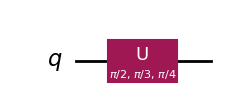

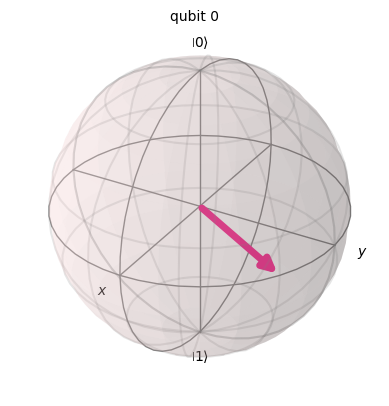

In [9]:
from qiskit.quantum_info import Statevector



qc = QuantumCircuit(1)

qc.u(np.pi/2, np.pi/3,np.pi/4,0) 
#qc.h(0)

display(qc.draw(output='mpl'))


Statevector(qc).draw('Bloch')

La concatenación de puertas se corresponde con la <i>composición de operadores</i>, es decir, con la <i>multiplicación de las matrices</i> asociadas. 
 

<div class="alert alert-block alert-danger",text-align:center>
<b> Nota</b>: 
    
El orden en que aparecen en el circuito cuántico es  el <b>inverso</b> del que tienen en la composición algebráica de operadores
</div>

Por ejemplo, un circuito que simule la acción  $SH\ket{\psi}$ debe hacer actuar primero $H$ y después $S$

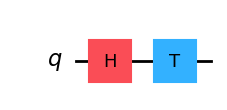

<IPython.core.display.Latex object>

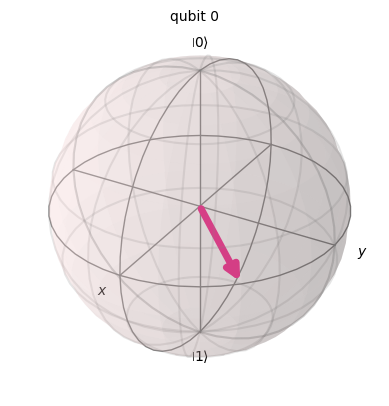

In [14]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)

#qc.x(0)
#qc.y(0)
qc.h(0)
#qc.z(0)
#qc.s(0)
qc.t(0)

# qc.u(theta,phi,lambda,quantum register)  https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html
#qc.u(np.pi/4,np.pi/2,0,0)
display(qc.draw(output='mpl'))

display(Statevector(qc).draw('Latex'))
display(Statevector(qc).draw('Bloch'))